# Quantum Phase Estimation

defining a gate whose eigenvector is |1>

In [13]:
def controlled_U(qc , control , target , power):
    angle = 2 * np.pi * J * (2 ** power)
    qc.cp(angle, control, target)

constructing inverse Quantum Fourier Transform : backtracking Quantum Fourier Transform

In [14]:
def IQFT(qc, qubits):
    n = len(qubits)
    for i in range(n // 2):
        qc.swap(qubits[i], qubits[n - i - 1])
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), qubits[m], qubits[j])
        qc.h(qubits[j])

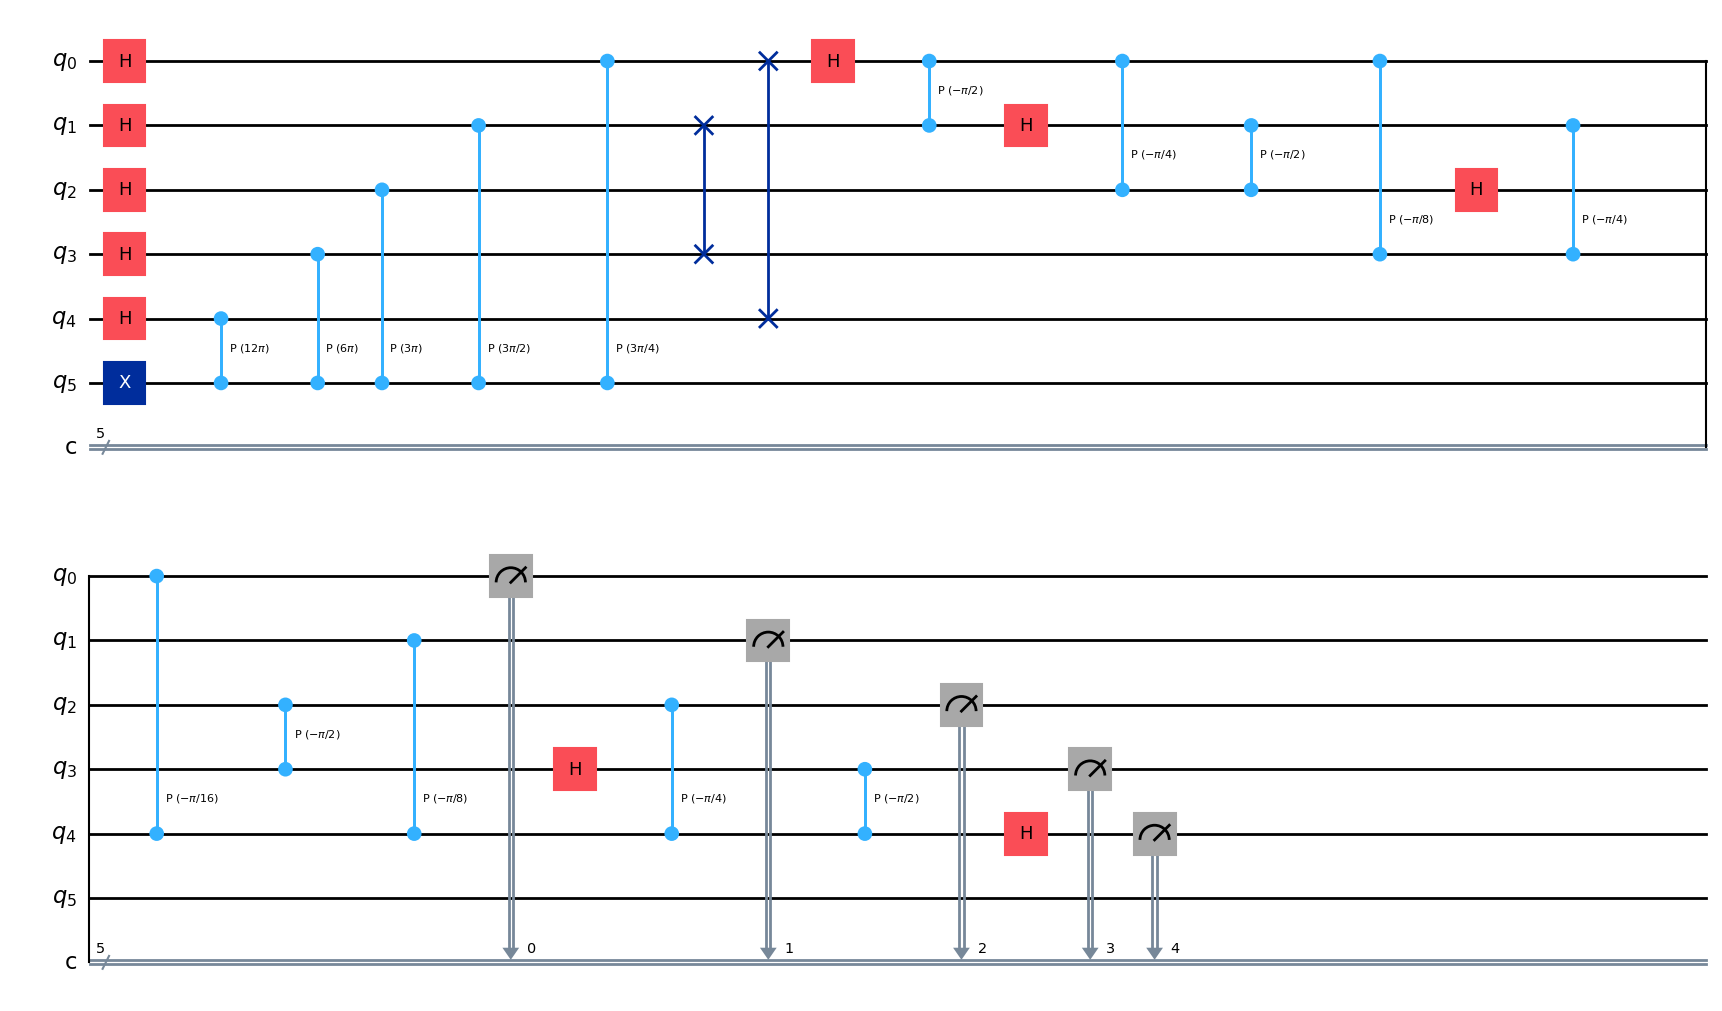

In [ ]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

J= 0.375

n=5

qc= QuantumCircuit(n+1,n)

for i in range(n):
    qc.h(i)

qc.x(n)      # preparing Eigenvector |1>

for q in range(n):
    controlled_U(qc,n-q-1, n,n - q - 1)
    
IQFT(qc, list(range(n)))

qc.measure(range(n), range(n))

qc.draw("mpl")
plt.show();



In [16]:
from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("Measurement Results:", counts)


Measurement Results: {'01100': 4096}


here the output is 01100 : converting to decimal gives -----  0.375 



therefore eigen value for given eigenvector ----  2* PI*0.375

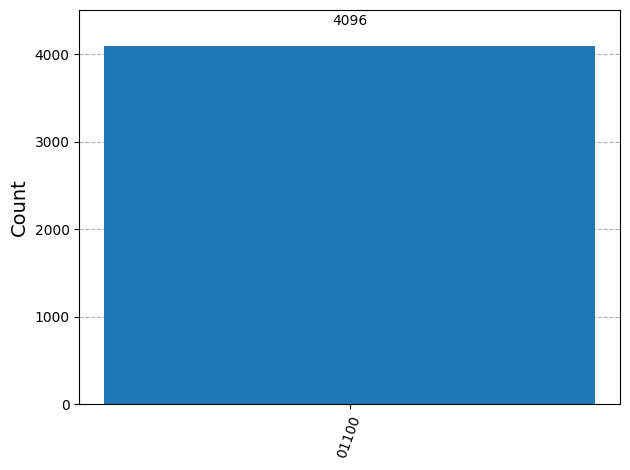

In [17]:
plot_histogram(counts);